In [1]:
import numpy as np
import pygimli as pg
#import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle

In [2]:
dir='//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/'

In [4]:
#data = ert.load(dir+"res2dinv_inputs/amphibious_ERT_eastern_transect2_gps.Dat")
data = ert.load(dir+"res2dinv_inputs/transects_split_in_three/amphibious_ERT_eastern_transect_gps_center.dat")
data

27/05/24 - 10:11:47 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


Data: Sensors: 27 data: 164, nonzero entries: ['a', 'b', 'm', 'n', 'rhoa', 'valid']

27/05/24 - 10:12:03 - pyGIMLi - INFO - Create default mesh for geometric factor calculation.
27/05/24 - 10:12:04 - pyGIMLi - INFO - Save RVector binary
27/05/24 - 10:12:04 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\4653169337310691530
27/05/24 - 10:12:04 - pyGIMLi - INFO - Save RVector binary
27/05/24 - 10:12:04 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\982929574901384086


164 [35.861175147167465,...,33.13425572258961]

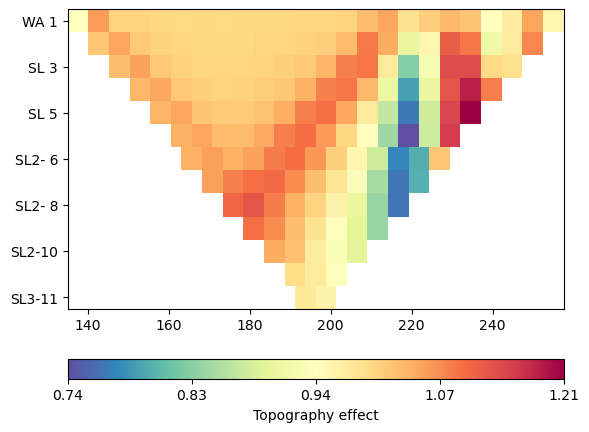

In [6]:
#data.setSensorPositions(pg.meshtools.interpolateAlongCurve(data.additionalPoints(), pg.x(data)))
data['k'] = ert.createGeometricFactors(data, numerical=True)
mgr = ert.ERTManager(sr=False)
k0 = ert.createGeometricFactors(data)
ert.showData(data, vals=k0/data['k'], label='Topography effect')
data
data['k']

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x14374f17c90>)

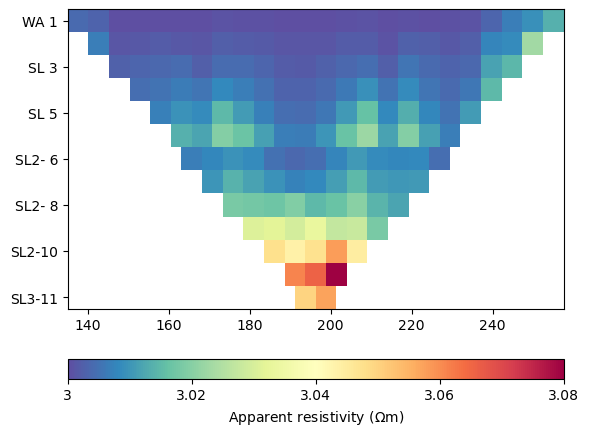

In [7]:
data['err'] = ert.estimateError(data, relativeError=0.03, absoluteUError=5e-5)
ert.show(data, data['err']*100)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x14374c1e410>)

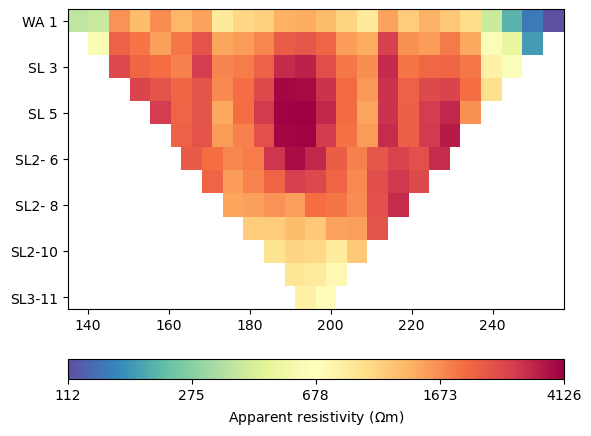

In [8]:
ert.showData(data)

27/05/24 - 10:13:21 - pyGIMLi - INFO - Found 2 regions.
27/05/24 - 10:13:21 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
27/05/24 - 10:13:21 - pyGIMLi - INFO - Found 2 regions.
27/05/24 - 10:13:21 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
27/05/24 - 10:13:21 - pyGIMLi - INFO - Creating forward mesh from region infos.
27/05/24 - 10:13:21 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
27/05/24 - 10:13:21 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 1599 Cells: 2968 Boundaries: 2340
27/05/24 - 10:13:21 - pyGIMLi - INFO - Use median(data values)=1883.04395
27/05/24 - 10:13:21 - pyGIMLi - INFO - Created startmodel from forward operator: 525, min/max=1883.043950/1883.043950
27/05/24 - 10:13:21 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000014370DC9490>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000014370F8B6A0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001436C758AE0>
min/max (data): 112/4126
min/max (error): 3%/3.08%
min/max (start model): 1883/1883
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  417.68
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  100.77 (dPhi = 74.66%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   10.60 (dPhi = 82.84%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    5.86 (dPhi = 24.79%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    4.85 (dPhi = 8.24%) lam: 20.0
---------------

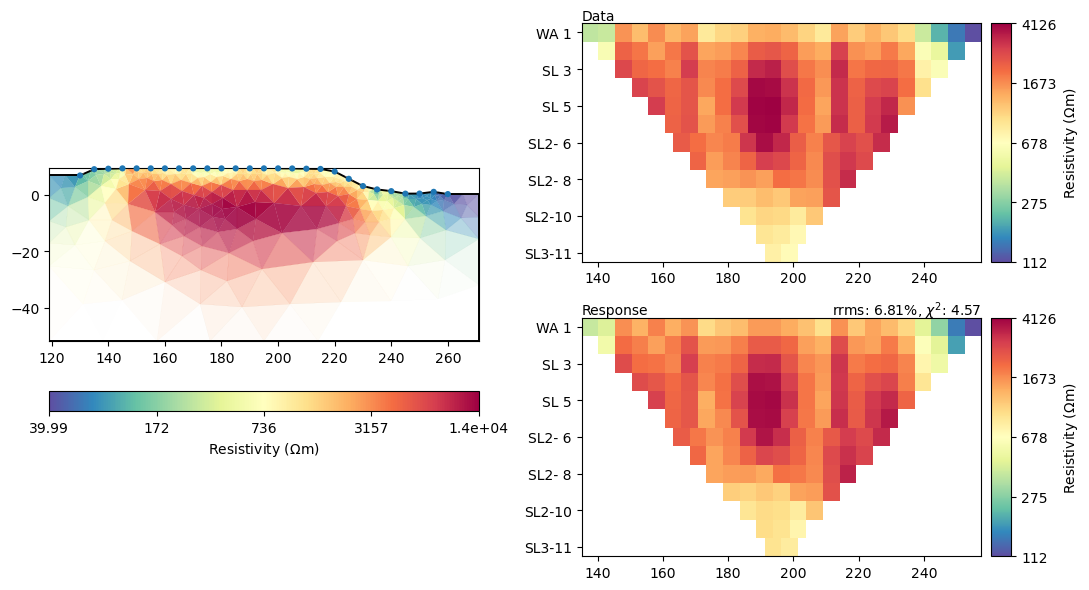

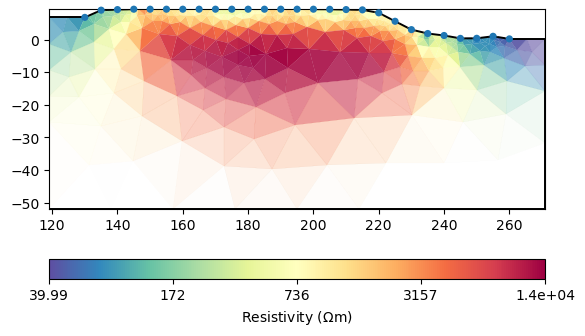

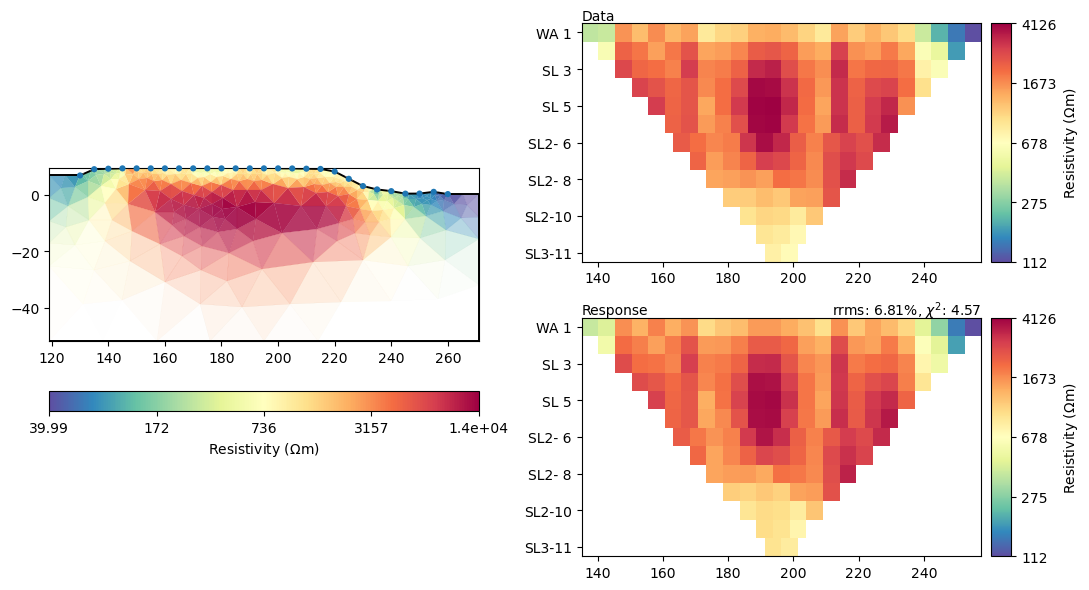

In [9]:
mgr.invert(data, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20)

mgr.showResult()
mgr.showResultAndFit()

27/05/24 - 10:15:05 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_Eastern_centern\ERTManager


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_Eastern_centern\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: >)

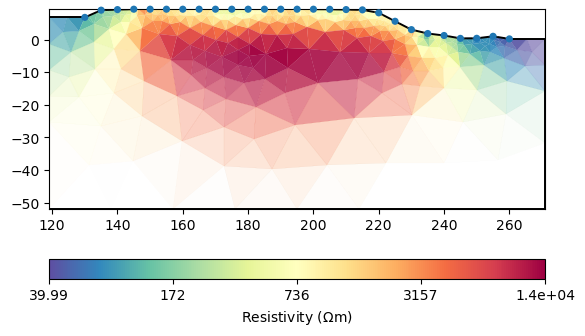

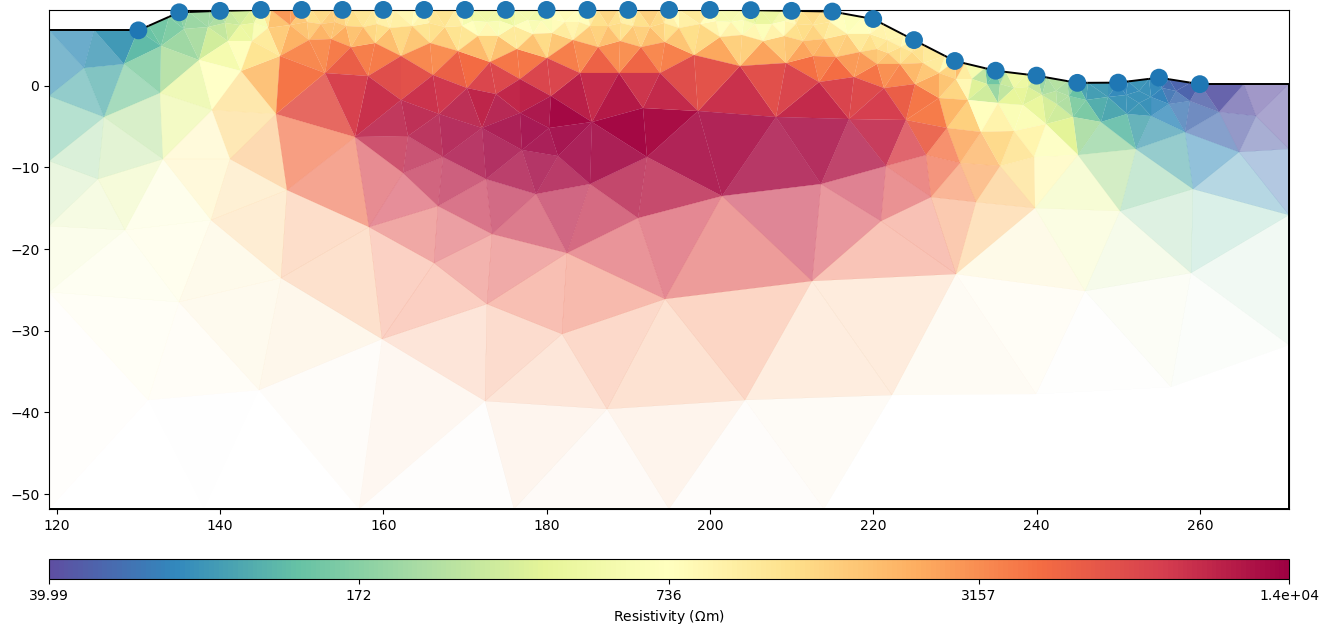

In [10]:
mgr.showResult()
mgr.saveResult(dir+ 'pygimli/all_inversions/INV_Eastern_centern')